<a href="https://colab.research.google.com/github/oliviatirso/AI-Project/blob/main/Imrpovement_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* NAME: Olivia Tirso



alex imported and extracted the files

import necessary libaries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import os
from google.colab import drive

Extracts files

In [ ]:
# Mount Google Drive, Alex implemented
from google.colab import drive
drive.mount('/content/drive')

import os
import zipfile

# Path to your .zip file (adjust to match your shortcut location)
zip_path = '/content/drive/My Drive/Cats.zip'

# Extract the zip file to a directory in Colab
extract_path = '/content/cats_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)

# List files and directories
for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}")
    for file in files:
        print(f"  File: {file}")

Streaming output truncated to the last 5000 lines.
  File: 00001074_006.jpg
  File: 00000972_009.jpg.cat
  File: 00000979_008.jpg.cat
  File: 00001077_000.jpg.cat
  File: 00001074_016.jpg
  File: 00000955_009.jpg.cat
  File: 00000984_021.jpg.cat
  File: 00001084_007.jpg
  File: 00000983_009.jpg.cat
  File: 00001004_023.jpg
  File: 00001017_007.jpg.cat
  File: 00001078_023.jpg.cat
  File: 00001045_027.jpg
  File: 00001095_003.jpg
  File: 00001087_025.jpg.cat
  File: 00001096_014.jpg
  File: 00000944_022.jpg.cat
  File: 00001061_001.jpg.cat
  File: 00001008_013.jpg.cat
  File: 00000953_027.jpg
  File: 00000982_025.jpg.cat
  File: 00000993_021.jpg.cat
  File: 00000901_025.jpg.cat
  File: 00001026_002.jpg
  File: 00001060_005.jpg.cat
  File: 00000917_024.jpg
  File: 00001035_018.jpg
  File: 00000909_016.jpg
  File: 00001029_020.jpg.cat
  File: 00000983_004.jpg.cat
  File: 00001035_007.jpg
  File: 00001014_022.jpg.cat
  File: 00000962_008.jpg
  File: 00001052_005.jpg
  File: 00001086_003.jp

In [ ]:
# Define the path to your dataset directory
dataset_directory = '/content/cats_dataset'


In [ ]:
print(os.listdir(dataset_directory))



['CAT_05', 'CAT_03', 'CAT_00', 'CAT_02', 'cats', 'CAT_01', 'CAT_04', 'CAT_06']


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset  # Import Dataset from PyTorch
import torchvision.transforms as transforms  # Import transforms if you're going to use them

# Now define your custom dataset class
class CatsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.files = [os.path.join(root_dir, f) for f in os.listdir(root_dir)
                      if os.path.isfile(os.path.join(root_dir, f)) and (f.endswith('.jpg') or f.endswith('.png'))]

        print(f"Loaded {len(self.files)} images.")  # This will print the number of images loaded

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_name = self.files[idx]
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image


- custom dataset class
- prepares data with optional transformations
- provides dataset functionality

olivia provided the code tha prepares the data

In [ ]:
class CatsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        # Update this line to only include .jpg or .png files
        self.files = [os.path.join(root_dir, f) for f in os.listdir(root_dir)
                      if os.path.isfile(os.path.join(root_dir, f)) and (f.endswith('.jpg') or f.endswith('.png'))]

        print(f"Loaded {len(self.files)} images.")  # This will print the number of images loaded

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_name = self.files[idx]
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image


In [ ]:
def __init__(self, root_dir, transform=None):
    self.root_dir = root_dir
    self.transform = transform
    self.files = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]
    print(f"Loaded {len(self.files)} images.")


alex printed out the different locations of the folders

In [ ]:
print("Dataset directory:", dataset_directory)
print("Contents of the dataset directory:", os.listdir(dataset_directory))



Dataset directory: /content/cats_dataset
Contents of the dataset directory: ['CAT_05', 'CAT_03', 'CAT_00', 'CAT_02', 'cats', 'CAT_01', 'CAT_04', 'CAT_06']


In [ ]:
class CatsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = []
        for subdir, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    self.files.append(os.path.join(subdir, file))
        print(f"Loaded {len(self.files)} images.")


In [ ]:
class CatsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = []
        for subdir, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    self.files.append(os.path.join(subdir, file))
        print(f"Loaded {len(self.files)} images.")


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class CatsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = [os.path.join(root_dir, f) for f in os.listdir(root_dir)
                      if os.path.isfile(os.path.join(root_dir, f)) and (f.endswith('.jpg') or f.endswith('.png'))]
        print(f"Loaded {len(self.files)} images.")  # Confirm number of images loaded

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_name = self.files[idx]
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image


In [ ]:
# Define a path to your dataset directory
dataset_directory = '/content/cats_dataset'

# Optionally define transformations
transformations = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Instantiate your dataset
cats_dataset = CatsDataset(root_dir=dataset_directory, transform=transformations)


Loaded 19994 images.


In [ ]:
class CatsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = [os.path.join(root_dir, f) for f in os.listdir(root_dir)
                      if os.path.isfile(os.path.join(root_dir, f)) and (f.endswith('.jpg') or f.endswith('.png'))]
        print(f"Loaded {len(self.files)} images.")  # This will print the number of images loaded

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_name = self.files[idx]
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image


In [ ]:
class CatsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = []
        for subdir, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    self.files.append(os.path.join(subdir, file))
        print(f"Loaded {len(self.files)} images.")

    def __len__(self):
        return len(self.files)  # Ensure this method returns the number of files

    def __getitem__(self, idx):
        img_name = self.files[idx]
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image



In [ ]:
from torch.utils.data import Dataset
import os
from PIL import Image

class CatsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = []
        for subdir, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    self.files.append(os.path.join(subdir, file))
        print(f"Loaded {len(self.files)} images.")

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_name = self.files[idx]
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image



In [ ]:
# Assuming you've defined 'dataset_directory' and it points to the correct directory:
dataset_directory = '/content/cats_dataset'  # Example directory

# Instantiate your dataset
cats_dataset = CatsDataset(root_dir=dataset_directory)

# Now try to print the length
print(f"Total number of images in dataset: {len(cats_dataset)}")


Loaded 19994 images.
Total number of images in dataset: 19994


In [ ]:
# Manually invoke __len__ to see if it works
print("Manual length check:", cats_dataset.__len__())


Manual length check: 19994


- check dataset validity
- spilit data
- print size

In [ ]:
from torch.utils.data import random_split

total_images = len(cats_dataset)
if total_images == 0:
    raise ValueError("The dataset is empty. Please check your dataset loading logic.")

train_size = int(0.8 * total_images)
test_size = total_images - train_size

if train_size == 0 or test_size == 0:
    raise ValueError("Insufficient data for splitting into train and test sets. Increase dataset size or adjust the split ratio.")

train_dataset, test_dataset = random_split(cats_dataset, [train_size, test_size])
print(f"Training set size: {len(train_dataset)}, Testing set size: {len(test_dataset)}")


Training set size: 15995, Testing set size: 3999


In [ ]:
if len(train_dataset) > 0 and len(test_dataset) > 0:
    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    print("DataLoaders successfully created.")
else:
    raise ValueError("One of the datasets is empty. Check your dataset splitting logic.")


DataLoaders successfully created.


In [ ]:
print(f"Number of images in the training set: {len(train_loader.dataset)}")
print(f"Number of images in the test set: {len(test_loader.dataset)}")


Number of images in the training set: 15995
Number of images in the test set: 3999


define and prepare the model and dataset.
Trains the model wiht early stopping.
eveluate and visualize training performace.

alex and olivia worked on this code to have it up and running


Training the model...
Epoch 1/50, Train Loss: 1.7037, Test Loss: 1.6662
Epoch 2/50, Train Loss: 1.6631, Test Loss: 1.6637
Epoch 3/50, Train Loss: 1.6601, Test Loss: 1.6638
Epoch 4/50, Train Loss: 1.6559, Test Loss: 1.6618
Epoch 5/50, Train Loss: 1.6543, Test Loss: 1.6632
Epoch 6/50, Train Loss: 1.6541, Test Loss: 1.6636
Epoch 7/50, Train Loss: 1.6530, Test Loss: 1.6621
Epoch 8/50, Train Loss: 1.6528, Test Loss: 1.6612
Epoch 9/50, Train Loss: 1.6519, Test Loss: 1.6616
Epoch 10/50, Train Loss: 1.6511, Test Loss: 1.6618
Epoch 11/50, Train Loss: 1.6514, Test Loss: 1.6610
Epoch 12/50, Train Loss: 1.6500, Test Loss: 1.6588
Epoch 13/50, Train Loss: 1.6499, Test Loss: 1.6601
Epoch 14/50, Train Loss: 1.6497, Test Loss: 1.6604
Epoch 15/50, Train Loss: 1.6493, Test Loss: 1.6611
Epoch 16/50, Train Loss: 1.6486, Test Loss: 1.6602
Epoch 17/50, Train Loss: 1.6494, Test Loss: 1.6610
Early stopping triggered.


<ipython-input-38-1e8238138bae>:116: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))  # Load the best model


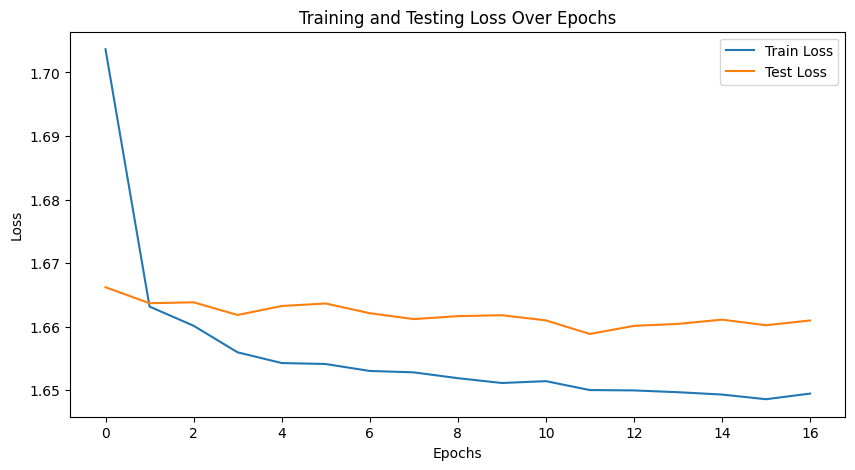

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define the LeNet model
class LeNet(nn.Module):
    def __init__(self, num_classes):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout(p=0.5)  # Add dropout with 50% probability
        self.fc1 = None  # Placeholder for dynamic initialization
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)

        if self.fc1 is None:
            flattened_dim = x.view(x.size(0), -1).size(1)
            self.fc1 = nn.Linear(flattened_dim, 120).to(x.device)

        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Prepare the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

dataset_path = '/content/cats_dataset'
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Get class names and number of classes
class_names = dataset.classes
num_classes = len(class_names)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define and initialize the model
model = LeNet(num_classes=num_classes).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the training function with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=15, device='cpu', patience=5):
    train_losses = []
    test_losses = []
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Testing phase
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_test_loss += loss.item()

        avg_test_loss = running_test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

        # Early stopping
        if avg_test_loss < best_loss:
            best_loss = avg_test_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(torch.load('best_model.pth'))  # Load the best model
    return train_losses, test_losses

# Train the model
print("Training the model...")
train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    criterion,
    optimizer,
    epochs=50,
    device=device,
    patience=5
)

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Testing Loss Over Epochs")
plt.legend()
plt.show()


In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
# Create the directory if it doesn't exist
os.makedirs("./Saved Models", exist_ok=True)


In [ ]:
# Save the model
torch.save(model, "./Saved Models/LeNet.pt")


In [ ]:
# Save the trained model

# Create the directory if it doesn't exist
os.makedirs("./Saved Models", exist_ok=True)

# Save the model
torch.save(model, "./Saved Models/LeNet.pt")

1. Evaluate the model on test data.
2. calculate performace metrics.
3. display the results.

alex and olivia provided the metrics and displayed them

In [ ]:
def evaluate_model_with_metrics(model, test_loader, device='cpu'):
    model.to(device)
    model.eval()

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Convert to numpy arrays
    all_labels = torch.tensor(all_labels).numpy()
    all_predictions = torch.tensor(all_predictions).numpy()

    # Calculate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Metrics calculations
    accuracy = cm.diagonal().sum() / cm.sum()
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    # Specificity calculation for each class and average
    specificity_per_class = []
    for i in range(len(cm)):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_per_class.append(specificity)
    avg_specificity = sum(specificity_per_class) / len(specificity_per_class)

    # Display metrics
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {avg_specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Load model
model = torch.load("./Saved Models/LeNet.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Evaluating the model...")
evaluate_model_with_metrics(model, test_loader, device=device)

<ipython-input-42-96756fe65de8>:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("./Saved Models/LeNet.pt")


Evaluating the model...
Evaluation Metrics:
Accuracy: 0.4956
Precision: 0.2456
Recall: 0.4956
Specificity: 0.8750
F1 Score: 0.3285


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np


In [ ]:
from sklearn.metrics import confusion_matrix
import torch
import numpy as np  # Ensure NumPy is imported

model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:  # Assuming 'test_loader' is your DataLoader
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays for compatibility with sklearn functions
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)



In [ ]:
conf_matrix = confusion_matrix(all_labels, all_predictions)


alex displayed the confusion matrix

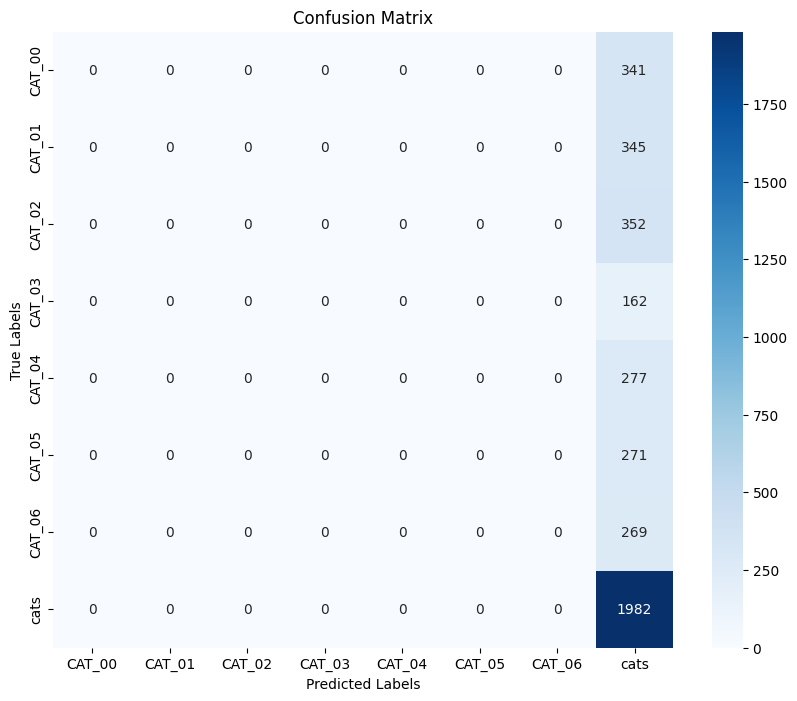

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
for images, labels in test_loader:
    print("Batch size:", images.size(0))  # Print how many images are in a batch
    break  # Only check the first batch


Batch size: 64


In [ ]:
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    print("Predictions:", predictions)  # Check if predictions are being made
    break  # Only check the first batch


Predictions: tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], device='cuda:0')


In [ ]:
%matplotlib inline


In [ ]:
class_names = dataset.classes  # This should be defined where your dataset is setup


In [ ]:
print("Breed mapping keys:", breed_mapping.keys())




Breed mapping keys: dict_keys([0, 1, 2, 3, 4, 5])


In [ ]:
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

    for i in range(images.size(0)):
        print("Label:", labels[i].item(), "Prediction:", predictions[i].item())  # Debug output


Label: 7 Prediction: 7
Label: 4 Prediction: 7
Label: 5 Prediction: 7
Label: 7 Prediction: 7
Label: 1 Prediction: 7
Label: 7 Prediction: 7
Label: 6 Prediction: 7
Label: 7 Prediction: 7
Label: 4 Prediction: 7
Label: 0 Prediction: 7
Label: 2 Prediction: 7
Label: 6 Prediction: 7
Label: 0 Prediction: 7
Label: 2 Prediction: 7
Label: 4 Prediction: 7
Label: 1 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 0 Prediction: 7
Label: 5 Prediction: 7
Label: 5 Prediction: 7
Label: 7 Prediction: 7
Label: 1 Prediction: 7
Label: 7 Prediction: 7
Label: 2 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 3 Prediction: 7
Label: 7 Prediction: 7
Label: 2 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 5 Prediction: 7
Label: 7 Prediction: 7
Label: 0 Prediction: 7
Label: 6 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 7 Prediction: 7
Label: 0 Pr

In [ ]:
unique_predictions = set()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    unique_predictions.update(predictions.cpu().numpy())

print("Unique predicted labels:", unique_predictions)


Unique predicted labels: {7}


1. Extract and prepare dataset
2. classify images using a pretrained model
3. dispaly results

olivia didi breed mapping and classified the images using the pretrained model

In [ ]:
import os
import zipfile
import torch
import matplotlib.pyplot as plt
from PIL import Image
from transformers import AutoImageProcessor, BitForImageClassification

# Ensure dataset is extracted
zip_path = "/content/drive/My Drive/Cats.zip"
extract_path = "/content/cats_dataset"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted to:", extract_path)
else:
    print("Dataset already extracted.")

# Verify dataset structure
print("Contents of extracted dataset:")
for root, dirs, files in os.walk(extract_path):
    print("Directory:", root)
    print("Subdirectories:", dirs)

# Adjust based on actual subdirectory names
breed_mapping = {
    "CAT_01": "Siamese",
    "CAT_02": "Persian",
    "CAT_03": "Maine Coon",
    "CAT_04": "Bengal",
    "CAT_05": "Sphynx",
    "CAT_06": "Ragdoll",
}

# Display classification results
def display_classification_results_with_actual_and_predicted(model, base_directory, breed_mapping, num_images=5):
    image_processor = AutoImageProcessor.from_pretrained("google/bit-50")

    images_shown = 0
    for folder_name, breed_name in breed_mapping.items():
        class_directory = os.path.join(base_directory, folder_name)
        if not os.path.exists(class_directory):
            print(f"Warning: Directory not found: {class_directory}")
            continue  # Skip missing directories

        files = os.listdir(class_directory)
        image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        if not image_files:
            print(f"No image files found in the directory: {class_directory}")
            continue

        for i in range(min(num_images, len(image_files))):
            if images_shown >= num_images:
                return

            image_path = os.path.join(class_directory, image_files[i])
            image = Image.open(image_path)

            # Prepare the image for prediction
            inputs = image_processor(image, return_tensors="pt")

            # Perform prediction
            with torch.no_grad():
                logits = model(**inputs).logits
                predicted_label = logits.argmax(-1).item()
                predicted_class_name = model.config.id2label[predicted_label]

            # Display the image with actual and predicted labels
            plt.figure(figsize=(4, 4))
            plt.imshow(image)
            plt.title(f"Actual: {breed_name}\nPredicted: {predicted_class_name}")
            plt.axis("off")
            plt.show()

            images_shown += 1
            if images_shown >= num_images:
                break

# Example usage
base_directory = extract_path
model = BitForImageClassification.from_pretrained("google/bit-50")

print("\nDisplaying classification results...")
display_classification_results_with_actual_and_predicted(
    model=model,
    base_directory=base_directory,
    breed_mapping=breed_mapping,
    num_images=10
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Cats.zip'

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/cat1.jpg"
image = Image.open(image_path)

# Apply transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

image_tensor = transform(image).unsqueeze(0)

# Load the model
model_path = "./Saved Models/LeNet.pt"
model = torch.load(model_path)
model.eval()

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
image_tensor = image_tensor.to(device)

# Predict
with torch.no_grad():
    output = model(image_tensor)
    predicted_class_index = torch.argmax(output, dim=1).item()

# Map the prediction to class names
class_names = ["Siamese", "Persian", "Maine Coon", "Bengal", "Sphynx", "Ragdoll"]
predicted_class_name = class_names[predicted_class_index]

# Display result
print(f"The model predicts the cat is a: {predicted_class_name}")
plt.imshow(image)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis("off")
plt.show()


<ipython-input-2-8aea2599f601>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


FileNotFoundError: [Errno 2] No such file or directory: './Saved Models/LeNet.pt'

trying